<a href="https://colab.research.google.com/github/nickmirunsw/py-learning/blob/main/tensorflow/tfnm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
# chatgpt cheatsheet and example

# import tensorflow as tf
# import numpy as np
# import matplotlib.pyplot as plt

# # 1. Core TensorFlow Operations
# print("\n### Core TensorFlow Operations ###")
# constant_tensor = tf.constant([1, 2, 3], dtype=tf.float32, name="my_constant")
# variable_tensor = tf.Variable(initial_value=[4, 5, 6], trainable=True, dtype=tf.float32, name="my_variable")

# print("Constant:", constant_tensor.numpy())
# print("Variable:", variable_tensor.numpy())

# # 2. Keras Model Building
# print("\n### Keras Model Building ###")
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(units=128, activation='relu', input_shape=(64,), name="dense_1"),
#     tf.keras.layers.BatchNormalization(name="batch_norm_1"),
#     tf.keras.layers.Dropout(rate=0.2, name="dropout_1"),
#     tf.keras.layers.Dense(units=64, activation='relu', name="dense_2"),
#     tf.keras.layers.BatchNormalization(name="batch_norm_2"),
#     tf.keras.layers.Dense(units=10, activation='softmax', name="output")
# ], name="sequential_model")

# model.summary()

# # 3. Model Compilation
# print("\n### Model Compilation ###")
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#     loss=tf.keras.losses.CategoricalCrossentropy(),
#     metrics=['accuracy']
# )

# # 4. Data Preprocessing
# print("\n### Data Preprocessing ###")
# x_train = np.random.rand(1000, 64)  # Dummy training data (1000 samples, 64 features)
# y_train = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(1000,)), num_classes=10)

# x_val = np.random.rand(200, 64)  # Validation data
# y_val = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(200,)), num_classes=10)

# # Normalize data (common preprocessing step)
# x_train = (x_train - np.mean(x_train)) / np.std(x_train)
# x_val = (x_val - np.mean(x_val)) / np.std(x_val)

# # 5. Model Training with Callbacks
# print("\n### Model Training ###")
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=3, restore_best_weights=True, verbose=1
# )
# history = model.fit(
#     x=x_train,
#     y=y_train,
#     validation_data=(x_val, y_val),
#     epochs=20,
#     batch_size=32,
#     callbacks=[early_stopping],
#     verbose=1
# )

# # 6. Visualizing Training History
# print("\n### Visualizing Training History ###")
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Loss Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Accuracy Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# # 7. Model Evaluation
# print("\n### Model Evaluation ###")
# loss, accuracy = model.evaluate(x_val, y_val, verbose=1)
# print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

# # 8. Model Prediction
# print("\n### Model Prediction ###")
# predictions = model.predict(x_val[:5])
# print("Predictions (softmax probabilities):", predictions)

# # 9. Transfer Learning with Pretrained Models
# print("\n### Transfer Learning ###")
# base_model = tf.keras.applications.MobileNetV2(
#     input_shape=(128, 128, 3),
#     include_top=False,
#     weights='imagenet'
# )
# base_model.trainable = False

# transfer_model = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),
#     base_model,
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

# transfer_model.compile(
#     optimizer=tf.keras.optimizers.Adam(),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )
# transfer_model.summary()

# # Dummy image data
# x_train_images = np.random.rand(100, 128, 128, 3)  # 100 RGB images of size 128x128
# y_train_images = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(100,)), num_classes=10)

# x_val_images = np.random.rand(20, 128, 128, 3)
# y_val_images = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(20,)), num_classes=10)

# # Train transfer learning model
# transfer_model.fit(
#     x=x_train_images,
#     y=y_train_images,
#     validation_data=(x_val_images, y_val_images),
#     epochs=5,
#     batch_size=16
# )

# # 10. Model Saving and Loading
# print("\n### Model Saving and Loading ###")
# model.save("my_model.h5")
# loaded_model = tf.keras.models.load_model("my_model.h5")
# print("Model loaded successfully!")

# # 11. TensorFlow Dataset API
# print("\n### TensorFlow Dataset API ###")
# dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# dataset = dataset.shuffle(buffer_size=100).batch(32).prefetch(tf.data.AUTOTUNE)

# for batch in dataset.take(1):
#     print("A batch of data:", batch)

# # 12. Advanced TensorFlow Features: Gradient Tape
# print("\n### Gradient Tape ###")
# x = tf.constant(3.0)
# y = tf.constant(4.0)

# with tf.GradientTape() as tape:
#     tape.watch(x)
#     z = x ** 2 + y ** 2
# gradients = tape.gradient(z, x)
# print("Gradient of z with respect to x:", gradients.numpy())


In [107]:

from ast import increment_lineno
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [108]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [109]:
print(f"x_train --> Shape:{x_train.shape} Length:{len(x_train)}")
print("=============")
print(f"x_train --> Shape:{y_train.shape} Length:{len(y_train)}")
print("=============")
print(f"x_test -->  Shape:{x_test.shape} Length:{len(x_test)}")
print("=============")
print(f"y_test -->  Shape:{y_test.shape} Length:{len(y_test)}")
print("=============")
print(x_train[0].shape)
print("=============")
print(y_train[0])
print("=============")
print(x_test[0].shape)
print("=============")
print(y_test[0])
print("=============")
# print(x_train[0])

x_train --> Shape:(60000, 28, 28) Length:60000
x_train --> Shape:(60000,) Length:60000
x_test -->  Shape:(10000, 28, 28) Length:10000
y_test -->  Shape:(10000,) Length:10000
(28, 28)
5
(28, 28)
7


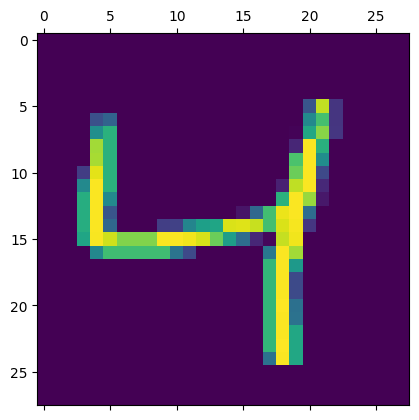

In [110]:
plt.matshow(x_train[2])

In [111]:
x_train = x_train/255
x_test = x_test/255

In [112]:
x_train_flattened = x_train.reshape((60000, 28*28))
x_test_flattened = x_test.reshape((10000, 28*28))
print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [113]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flattened, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8116 - loss: 0.7313
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9136 - loss: 0.3123
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9199 - loss: 0.2865
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9244 - loss: 0.2705
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9284 - loss: 0.2619


In [114]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9171 - loss: 0.3017


[0.2654082179069519, 0.9276999831199646]

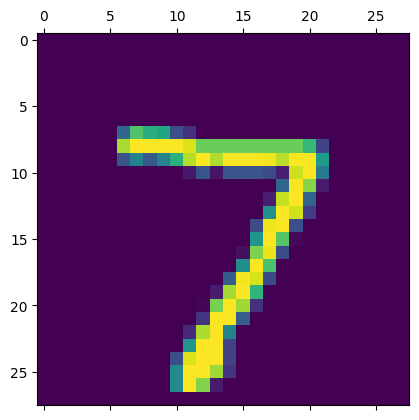

In [115]:
plt.matshow(x_test[0])

In [116]:
y_predicted = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [117]:
print(np.argmax(y_predicted[0]))

7


In [118]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [119]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
print(cm)

tf.Tensor(
[[ 959    0    1    2    0    5    9    2    1    1]
 [   0 1109    4    1    0    1    4    2   14    0]
 [   4    7  944   17    8    2   12    9   24    5]
 [   2    0   23  921    0   26    3   10   14   11]
 [   1    1    4    1  909    0   11    4    9   42]
 [   8    2    2   35    8  782   15    5   27    8]
 [   9    3    5    1    7   12  918    2    1    0]
 [   1    5   24    7    7    0    0  945    3   36]
 [   5    7    8   23    9   33    9   11  857   12]
 [   9    6    1   10   20    5    0   18    7  933]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

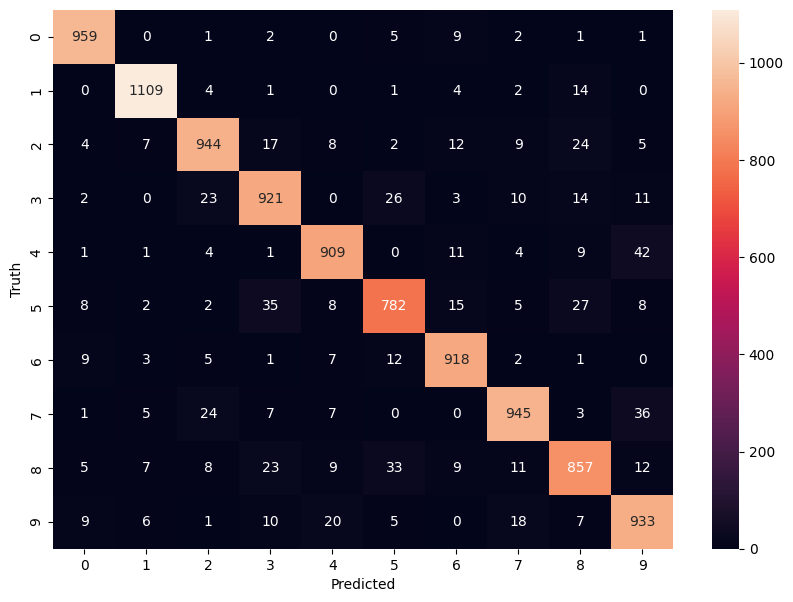

In [120]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [121]:
model = keras.Sequential([keras.layers.Dense(100, input_shape=(784,), activation="relu"),
                          keras.layers.Dense(10, activation='sigmoid')
                          ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flattened, y_train, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8722 - loss: 0.4526


In [122]:
y_predicted = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [123]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

tf.Tensor(
[[ 961    0    0    1    0    3    8    4    2    1]
 [   0 1124    3    1    1    1    3    0    2    0]
 [   7    5  967    9   10    3    6    7   18    0]
 [   0    1    5  970    0    8    1   10   11    4]
 [   0    0    4    0  960    0    8    1    3    6]
 [   2    1    0   14    4  848   10    2    7    4]
 [   5    3    0    1    9    7  929    1    3    0]
 [   1   14   11    5    9    1    0  967    1   19]
 [   4    5    5   10   12    8   11    7  903    9]
 [   3    8    1   11   34    3    1    7    6  935]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

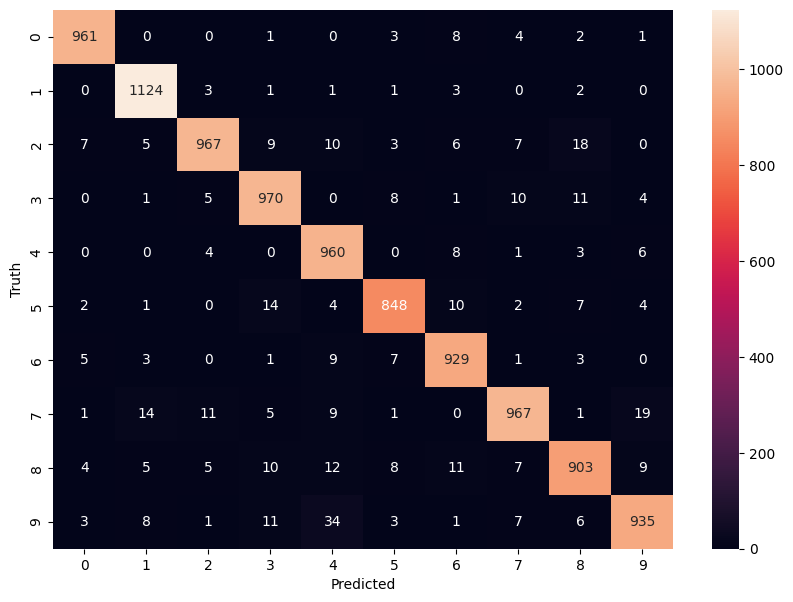

In [124]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
print(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [125]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(100, activation="relu"),
                          keras.layers.Dense(10, activation='sigmoid')
                          ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8732 - loss: 0.4574
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9627 - loss: 0.1272


In [126]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/refs/heads/master/6_gradient_descent/insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

In [128]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age']/100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age']/100

In [129]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10) #use epochs=5000 when running

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step - accuracy: 0.5000 - loss: 0.7113
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5000 - loss: 0.7110
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5000 - loss: 0.7106
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5000 - loss: 0.7102
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5000 - loss: 0.7098
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5000 - loss: 0.7094
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5000 - loss: 0.7091
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5000 - loss: 0.7087
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5000 - loss: 0.7083
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5000 - loss: 0.7079


In [130]:
model.evaluate(X_test_scaled, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.5000 - loss: 0.7282


[0.7282423973083496, 0.5]

In [131]:
w, b = model.get_weights()
print(w)
print("==================")
print(b)

[[0.99001  ]
 [0.9900079]]
[-0.00999467]


In [132]:
def sigmoid(x):
  import math
  return 1 / (1 + math.exp(-x))

print(sigmoid(18))

#numpy version
def sigmoidnp(x):
  return 1 / (1 + np.exp(-x))

0.9999999847700205


In [133]:
def prediction_function(age, affordibility):
  weighted_sum = w[0]*age + w[1]*affordibility + b
  return weighted_sum

nima = prediction_function(df['age'], df['affordibility'])
print(nima)
print("=========================")
sigmoid(nima[0])

0     22.760234
1     24.740256
2     47.510484
3     51.470527
4     46.520474
5     56.420574
6     54.440557
7     59.390607
8     62.360635
9     61.370625
10    18.800194
11    28.700294
12    26.720276
13    28.700296
14    49.490504
15    55.430564
16    24.740256
17    58.400595
18    18.800196
19    18.800194
20    21.770224
21    25.730266
22    40.580414
23    45.530464
24    50.480514
25    54.440554
26    23.750244
27    46.520474
dtype: float64


0.9999999998695763

In [134]:
y_predicted = np.array([1, 1, 0, 0, 1])
y_true = np.array([0.3, 0.7, 1, 0, 0.5])

print(y_predicted)
print(y_true)

[1 1 0 0 1]
[0.3 0.7 1.  0.  0.5]


In [135]:
def mae(y_true, y_predicted):
  mae = np.mean(np.abs(y_predicted - y_true))
  return mae

In [136]:
mae(y_true, y_predicted)

0.5

In [137]:
def ll(y_true, y_predicted):
  eplison = 1e-15
  y_predicted_log_adjusted = [i-eplison if i == 1 else i+eplison for i in y_predicted]
  y_predicted_log_adjusted = np.array(y_predicted_log_adjusted)
  ll = -np.mean(y_true*np.log(y_predicted_log_adjusted) + (1-y_true)*np.log(1-y_predicted_log_adjusted))
  return ll

In [138]:
ll(y_true, y_predicted)

17.2696280766844

In [139]:
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [150]:
# developing gradient descent method from scratch
# use functions ll() and sigmoidnp()

In [158]:
def gradient_descent(age, affordibility, y_true, epochs):
  w1 = w2 = 1
  b = 0
  learning_rate = 0.5
  n = len(age)

  for i in range(epochs):
    weighted_sum = w1 * age + w2 * affordibility + b
    y_predicted = sigmoidnp(weighted_sum)
    loss = ll(y_true, y_predicted)

    w1 = w1 - learning_rate*(1/n)*np.dot(np.transpose(age), (y_predicted-y_true))
    w2 = w2 - learning_rate*(1/n)*np.dot(np.transpose(affordibility), (y_predicted-y_true))
    b = b - learning_rate*np.mean(y_predicted-y_true)

    print(f"Epoch {i} w1:{w1}, w2:{w2}, b:{b}")

  return w1, w2, b



In [159]:
gradient_descent(X_train_scaled['age'], X_train_scaled['affordibility'], y_train, 5)

Epoch 0 w1:0.974907633470177, w2:0.948348125394529, b:-0.11341867736368583
Epoch 1 w1:0.9556229728273669, w2:0.9058873696677865, b:-0.2122349122718517
Epoch 2 w1:0.9416488476693794, w2:0.8719790823960313, b:-0.2977578997796538
Epoch 3 w1:0.9323916996249162, w2:0.8457541517722915, b:-0.3715094724003511
Epoch 4 w1:0.9272267472726993, w2:0.8262362885332687, b:-0.43506643026891584


(0.9272267472726993, 0.8262362885332687, -0.43506643026891584)